# Oppgave a)

In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
# import functions from src folder
import data_generation as dg
import gradient_descent as gd
import regression_cost_funcs as rcf
import regression_tools as rt

In [4]:
sb.set_theme()

In this analysis we will evaluate model with MSE after a Gradient descent several times, we therefor consider it clever to employ afunction which with given parameters and data gives us the MSE directly:

In [19]:
def find_MSE(X_train, X_test, z_train, z_test, w_init,
              model, learning_rate, epochs=1000, mode="normal",
                 momentum=0, batch_size=None, store_extra=False):
    
    """Returns the MSE for theese spesifications, works for ridge and lambda regression"""
    
    descent = gd.GradientDescent(mode=mode, momentum_param=momentum, batch_size=batch_size, store_extra=store_extra)
    w = descent.train(X_train, w_init, z_train, model, learning_rate=learning_rate, n_epochs = epochs)
    if store_extra:
        MSE_arr = rt.MSE_vec(z_test, (X_test@descent.weights.T).T)
        return MSE_arr
    else:  
        MSE = rt.MSE(z_test, X_test@w.flatten())
        return MSE

## Generate data from franke function

In [57]:
N = 1000 #nr of data points
x, y, z, true_z = dg.generate_data_Franke(N=N, sigma2=0.1, seed=0)

poly_grad = 5
X = rt.create_X_polynomial(x, y, poly_grad)

# Split data:
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.25)

print(np.shape(z_train))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
z_train = scaler.fit_transform(z_train.reshape(-1, 1)).flatten()
z_test = scaler.transform(z_test.reshape(-1, 1)).flatten()

(750,)


# Gradient Descent anlysis:

Plot MSE as a function of learning-rate for OLS and Ridge (with a few different regularisation values)

In [111]:
w_init = np.zeros(len(X[0]))
epochs = 1000

In [114]:
# OLS and Ridge:
lambda_values = [0, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
lr_range = np.linspace(0, 1, 50)
MSE_Ridge = np.zeros((len(lambda_values), len(lr_range)))

for i, lambdaer in enumerate(lambda_values):
    model = rcf.RidgeCost(lambdaer)
    for j, lr in enumerate(lr_range):
        MSE_Ridge[i, j] = find_MSE(X_train, X_test, z_train, z_test, w_init, model, lr, epochs=epochs, mode="normal")
        
        """ Implementation of settig MSE to nan if MSE[j]>..."""
        if MSE_Ridge[i, j] > MSE_Ridge[i, 0]+5:
            for index in range(j, len(lr_range)): MSE_Ridge[i, index] = np.NaN
            break

## Plot 1 - 1000 n_epochs:

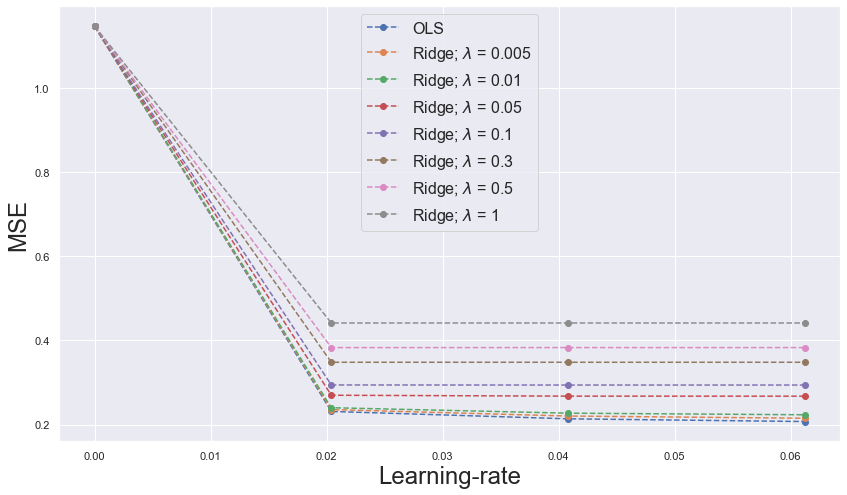

In [115]:
plt.figure(figsize=(14,8))
for i, lambdaer in enumerate(lambda_values):
    if lambdaer == 0:
        plt.plot(lr_range, MSE_Ridge[i], "--o", label=f"OLS")
    else:
        plt.plot(lr_range, MSE_Ridge[i], "--o", label=fr"Ridge; $\lambda$ = {lambdaer}")
plt.xlabel("Learning-rate", fontsize=24)
plt.ylabel("MSE", fontsize=24)
plt.legend(fontsize=16, loc="upper center")
plt.show()

In [116]:
# analytic
MSE = rt.MSE(z_test , X_test@rt.ols_regression(X_train, z_train ))
print(MSE)

0.1265452987470834


In [71]:
# Estimated divergence learning-rates for epochs : 1000
print(f"An estimate for the lagrgest learning rate we could choose before the GD diverges,")
print(f"for an given lambda is")
print("---------------------------------")

print(f"n_epochs = {epochs} :")
print("Lambda -- Learning-rate -- Min MSE")
print("----------------------------------")
for i, lambdaer in enumerate(lambda_values):
    arr = MSE_Ridge[i]
    print(f"{lambdaer:.3f}       {lr_range[ len(arr[~np.isnan(arr)]) - 1] : .3f}       {np.nanmin(MSE_Ridge[i]):.3f}")
    

An estimate for the lagrgest learning rate we could choose before the GD diverges,
for an given lambda is
---------------------------------
n_epochs = 40000 :
Lambda -- Learning-rate -- Min MSE
----------------------------------
0.000        0.150       0.138


# For n_epochs 500 and 100 and 50

We now do a simmelar analysis to investigate how the number of epochs will change the result

In [77]:
print(f"An estimate for the lagrgest learning rate we could choose before the GD diverges,")
print(f"for an given lambda is")
print("---------------------------------")


# OLS and Ridge:
epochs = 500
lambda_values = [0, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
lr_range = np.linspace(0.001, 0.7, 100)
MSE_Ridge = np.zeros((len(lambda_values), len(lr_range)))

for i, lambdaer in enumerate(lambda_values):
    model = rcf.RidgeCost(lambdaer)
    for j, lr in enumerate(lr_range):
        MSE_Ridge[i, j] = find_MSE(X_train, X_test, z_train, z_test, w_init, model, lr, epochs=epochs)
        """ Implementation of settig MSE to nan if MSE>1"""
        if MSE_Ridge[i, j] > MSE_Ridge[i, 0]:
            for index in range(j, len(lr_range)): MSE_Ridge[i, index] = np.NaN
            break




print(f"n_epochs = {epochs} :")
print("Lambda -- Learning-rate -- Min MSE")
print("----------------------------------")
for i, lambdaer in enumerate(lambda_values):
    arr = MSE_Ridge[i]
    print(f"{lambdaer:.3f}       {lr_range[ len(arr[~np.isnan(arr)]) - 1] : .3f}       {np.nanmin(MSE_Ridge[i]):.3f}")

epochs = 100
lambda_values = [0, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
lr_range = np.linspace(0.001, 0.7, 100)
MSE_Ridge = np.zeros((len(lambda_values), len(lr_range)))

for i, lambdaer in enumerate(lambda_values):
    model = rcf.RidgeCost(lambdaer)
    for j, lr in enumerate(lr_range):
        MSE_Ridge[i, j] = find_MSE(X_train, X_test, z_train, z_test, w_init, model, lr,epochs=epochs)
        """ Implementation of settig MSE to nan if MSE>1"""
        if MSE_Ridge[i, j] > MSE_Ridge[i, 0]:
            for index in range(j, len(lr_range)): MSE_Ridge[i, index] = np.NaN
            break
            
print(f"n_epochs = {epochs} :")
print("Lambda -- Learning-rate -- Min MSE")
print("----------------------------------")
for i, lambdaer in enumerate(lambda_values):
    arr = MSE_Ridge[i]
    print(f"{lambdaer:.3f}       {lr_range[ len(arr[~np.isnan(arr)]) - 1] : .3f}       {np.nanmin(MSE_Ridge[i]):.3f}")

    
epochs = 50
lambda_values = [0, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
lr_range = np.linspace(0.001, 0.7, 100)
MSE_Ridge = np.zeros((len(lambda_values), len(lr_range)))

for i, lambdaer in enumerate(lambda_values):
    model = rcf.RidgeCost(lambdaer)
    for j, lr in enumerate(lr_range):
        MSE_Ridge[i, j] = find_MSE(X_train, X_test, z_train, z_test, w_init, model, lr, epochs=epochs)
        """ Implementation of settig MSE to nan if MSE>1"""
        if MSE_Ridge[i, j] > MSE_Ridge[i, 0]:
            for index in range(j, len(lr_range)): MSE_Ridge[i, index] = np.NaN
            break
            
print(f"n_epochs = {epochs} :")
print("Lambda -- Learning-rate -- Min MSE")
print("----------------------------------")
for i, lambdaer in enumerate(lambda_values):
    arr = MSE_Ridge[i]
    print(f"{lambdaer:.3f}       {lr_range[ len(arr[~np.isnan(arr)]) - 1] : .3f}       {np.nanmin(MSE_Ridge[i]):.3f}")

    
epochs = 10
lambda_values = [0, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
lr_range = np.linspace(0.001, 0.7, 100)
MSE_Ridge = np.zeros((len(lambda_values), len(lr_range)))

for i, lambdaer in enumerate(lambda_values):
    model = rcf.RidgeCost(lambdaer)
    for j, lr in enumerate(lr_range):
        MSE_Ridge[i, j] = find_MSE(X_train, X_test, z_train, z_test, w_init, model, lr, epochs=epochs)
        """ Implementation of settig MSE to nan if MSE>1"""
        if MSE_Ridge[i, j] > MSE_Ridge[i, 0]:
            for index in range(j, len(lr_range)): MSE_Ridge[i, index] = np.NaN
            break
            
print(f"n_epochs = {epochs} :")
print("Lambda -- Learning-rate -- Min MSE")
print("----------------------------------")
for i, lambdaer in enumerate(lambda_values):
    arr = MSE_Ridge[i]
    print(f"{lambdaer:.3f}       {lr_range[ len(arr[~np.isnan(arr)]) - 1] : .3f}       {np.nanmin(MSE_Ridge[i]):.3f}")

An estimate for the lagrgest learning rate we could choose before the GD diverges,
for an given lambda is
---------------------------------
n_epochs = 500 :
Lambda -- Learning-rate -- Min MSE
----------------------------------
0.000        0.072       0.208
0.005        0.072       0.213
0.010        0.072       0.219
0.050        0.072       0.256
0.100        0.072       0.281
0.300        0.072       0.332
0.500        0.072       0.365
1.000        0.065       0.421
n_epochs = 100 :
Lambda -- Learning-rate -- Min MSE
----------------------------------
0.000        0.072       0.256
0.005        0.072       0.258
0.010        0.072       0.259
0.050        0.072       0.271
0.100        0.072       0.286
0.300        0.072       0.332
0.500        0.072       0.365
1.000        0.065       0.421
n_epochs = 50 :
Lambda -- Learning-rate -- Min MSE
----------------------------------
0.000        0.072       0.277
0.005        0.072       0.278
0.010        0.072       0.278
0.050      

# Plot to se MSE over epochs to see evolving of func.

No handles with labels found to put in legend.


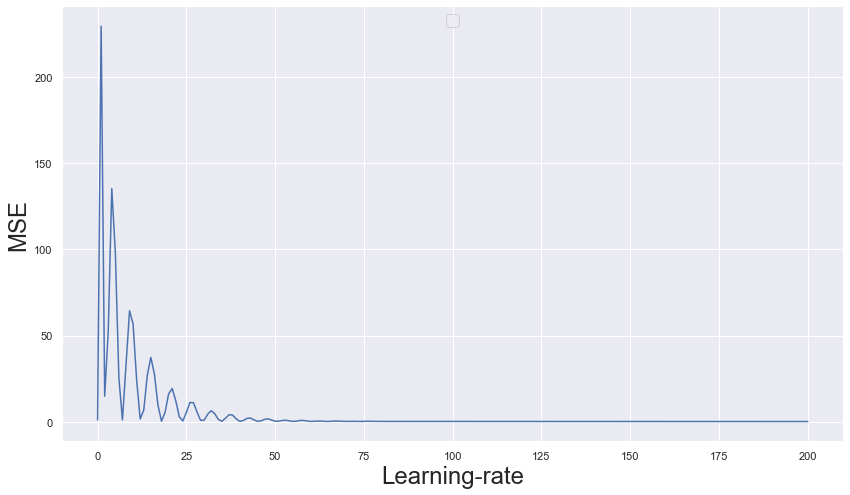

In [118]:
learning_rate = 1
model = rcf.RidgeCost(0)
w_init = np.zeros(len(X[0]))

epochs_stop = 200
lr_range = np.linspace(0.001, 0.003, 20)
MSE = np.zeros(epochs_stop+1)
MSE = find_MSE(X_train, X_test, z_train, z_test, w_init, model,
                                   learning_rate=learning_rate, epochs=epochs_stop, store_extra=True, mode="adam")
plt.figure(figsize=(14,8))
plt.plot(np.linspace(0, epochs_stop, epochs_stop+1), MSE, label=fr"")
plt.xlabel("Learning-rate", fontsize=24)
plt.ylabel("MSE", fontsize=24)
plt.legend(fontsize=16, loc="upper center")
plt.show()

# SGD - Stochastic Gradient Descent - Batch size = 1
And now compare with SKlearn.
In Stochastic Gradient Descent we can choose a parameter called mini-batches.

For SKlearn we dont have this oppertuntity, we therrefor do one plot of MSE over learningrate for SGD with minibatches=1

We want to plot MSE for OLS and 

Choose lambda = 0.01

In [72]:
w_init = np.zeros(len(X[0]))
lambdaen = 0.01
model = rcf.RidgeCost(lambdaen)

epochs_range = [5, 10]
lr_range = np.linspace(0.001, 0.007, 20)
MSE_Ridge = np.zeros((len(epochs_range), len(lr_range)))
MSE_SKlearn = np.zeros((len(epochs_range), len(lr_range)))
for i, epochs in enumerate(epochs_range):
    
    for j, lr in enumerate(lr_range):
        
        MSE_Ridge[i, j] = find_MSE(X_train, X_test, z_train, z_test, w_init, model, lr, epochs=epochs, batch_size=1)
        
     
        """ Implementation of settig MSE to nan if MSE[j]>MSE[j=0] """
        if MSE_Ridge[i, j] > (MSE_Ridge[i, 0]+1):
            for index in range(j, len(lr_range)): MSE_Ridge[i, index] = np.NaN
            break
 
    for j, lr in enumerate(lr_range):
        sk_model = skl.SGDRegressor(loss="squared_loss", alpha=lambdaen, 
                                    max_iter=epochs, tol=None, learning_rate="constant", eta0=lr)
        sk_model.fit(X_train, z_train)
        z_pred_SK = sk_model.predict(X_test)
        MSE_SKlearn[i, j] = rt.MSE(z_test, z_pred_SK)
    

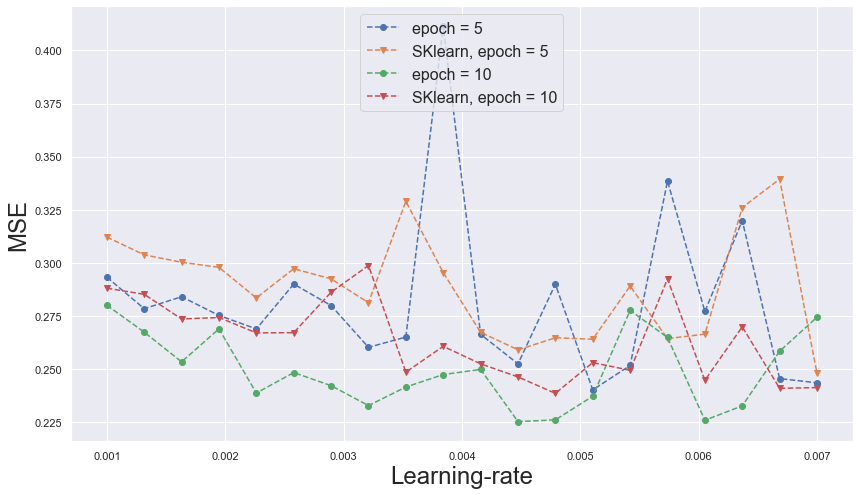

In [73]:
plt.figure(figsize=(14,8))
for i, epochs in enumerate(epochs_range[-2:]):
    plt.plot(lr_range, MSE_Ridge[i], "--o", label=fr"epoch = {epochs}")
    plt.plot(lr_range, MSE_SKlearn[i], "--v", label=fr"SKlearn, epoch = {epochs}")
plt.xlabel("Learning-rate", fontsize=24)
plt.ylabel("MSE", fontsize=24)
plt.legend(fontsize=16, loc="upper center")
plt.show()

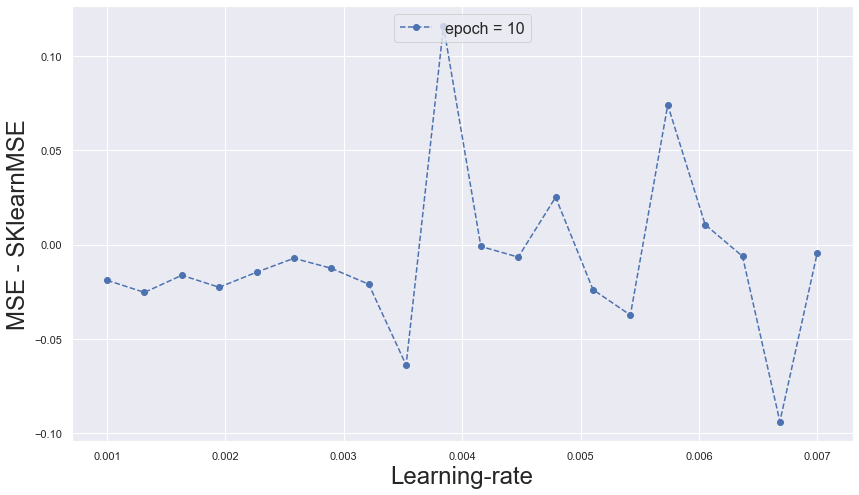

In [74]:
plt.figure(figsize=(14,8))
for i, epochs in enumerate(epochs_range[-1:]):
    plt.plot(lr_range, (MSE_Ridge[i] - MSE_SKlearn[i]), "--o", label=fr"epoch = {epochs}")
plt.xlabel("Learning-rate", fontsize=24)
plt.ylabel("MSE - SKlearnMSE", fontsize=24)
plt.legend(fontsize=16, loc="upper center")
plt.show()

## Analyze MSE development over epochs for different batch-sizes

We now want a range of bach sizes. For computational renons we want batch sizes to be an power of 2.
A list with $[8, 32, 128, 256]$  Choose a learning-rate of 0.1, by investigating the plot above, where batch_size = 1.
We do this for OLSCost.

In [54]:
batch_sizes = np.array([8, 32, 128, 256])
learning_rate = 0.1
model = rcf.OLSCost()
w_init = np.zeros(len(X[0]))

epochs_stop = 750
lr_range = np.linspace(0.001, 0.003, 20)
MSE = np.zeros((len(batch_sizes), epochs_stop+1))
for i, b_size in enumerate(batch_sizes):
    MSE[i] = find_MSE(X_train, X_test, z_train, z_test, w_init, model,
                                   learning_rate=learning_rate, epochs=epochs_stop, batch_size=b_size, store_extra=True)
        

/Users/halvortyseng/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/halvortyseng/Desktop/FYS-STK3155-project-2/notebooks/../regression_cost_funcs.py:117: RuntimeWarning: overflow encountered in square
  return np.mean((X @ w - y) ** 2)
/Users/halvortyseng/Desktop/FYS-STK3155-project-2/notebooks/../regression_cost_funcs.py:122: RuntimeWarning: overflow encountered in matmul
  return 2 / y.size * X.T @ (X @ w - y)
/Users/halvortyseng/Desktop/FYS-STK3155-project-2/notebooks/../regression_cost_funcs.py:122: RuntimeWarning: invalid value encountered in matmul
  return 2 / y.size * X.T @ (X @ w - y)
/Users/halvortyseng/Desktop/FYS-STK3155-project-2/notebooks/../gradient_descent.py:108: RuntimeWarning: invalid value encountered in multiply
  return self.momentum * self.momentum_param - eta * model.gradient(X, w, y)
/Users/halvortyseng/Desktop/FYS-STK3155-pr

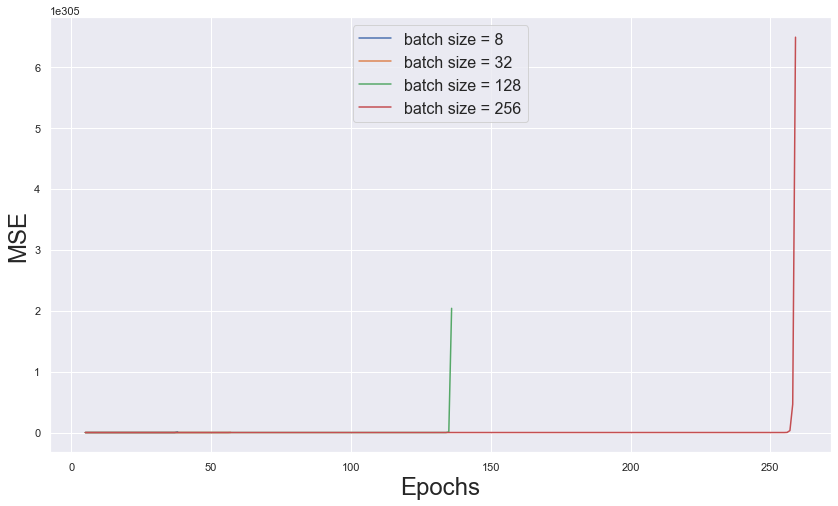

In [56]:
plt.figure(figsize=(14,8))
for i, b in enumerate(batch_sizes):
    plt.plot(np.linspace(0, 750, 751)[5:], MSE[i][5:], label=fr"batch size = {b}")
plt.xlabel("Epochs", fontsize=24)
plt.ylabel("MSE", fontsize=24)
plt.legend(fontsize=16, loc="upper center")
plt.show()

## Now with 10_000 datapoints to see impact

In [ ]:
N = 10_000 #nr of data points
x, y, z, true_z = dg.generate_data_Franke(N=N, sigma2=0.1, seed=0)

poly_grad = 5
X = rt.create_X_polynomial(x, y, poly_grad)

# Split data:
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.25)

In [ ]:
batch_sizes = np.array([8, 256, 1024])
learning_rate = 0.1
model = rcf.OLSCost()
w_init = np.zeros(len(X[0]))

epochs_stop = 750
lr_range = np.linspace(0.001, 0.3, 20)
MSE = np.zeros((len(batch_sizes), epochs_stop+1))

for i, b_size in enumerate(batch_sizes):
    MSE[i] = find_MSE(X_train, X_test, z_train, z_test, w_init, model,
                                   learning_rate=learning_rate, epochs=epochs_stop, batch_size=b_size, store_extra=True)
        

In [ ]:
plt.figure(figsize=(14,8))
for i, b in enumerate(batch_sizes):
    plt.plot(np.linspace(0, 750, 751)[5:], MSE[i][5:], label=fr"batch size = {b}")
plt.xlabel("Epochs", fontsize=24)
plt.ylabel("MSE - SKlearnMSE", fontsize=24)
plt.legend(fontsize=16, loc="upper center")
plt.show()

# Momentum Analysis

In [ ]:
#Choose Data:
N = 1000 #nr of data points
x, y, z, true_z = dg.generate_data_Franke(N=N, sigma2=0.1, seed=0)

poly_grad = 5
X = rt.create_X_polynomial(x, y, poly_grad)

# Split data:
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.25)

In [ ]:
batch_size = 128 #set a bach_size based on previos analysis
mode = "normal"
learning_rates = np.array([0.001, 0.005, 0.01, 0.1, 0.3])
epochs = 1000
momentum_parms = np.linspace(0, 1, 50)
model = rcf.OLSCost()
w_init = np.zeros(len(X[0]))
MSE = np.zeros((len(learning_rates), len(momentum_parms) ))

for i, lr in enumerate(learning_rates):
    #model = rcf.RidgeCost(lambdaer)
    
    for j, mom in enumerate(momentum_parms):
        MSE[i, j] = find_MSE(X_train, X_test, z_train, z_test, w_init, model, lr, epochs=epochs, momentum=mom)
        """ Implementation of settig MSE to nan if MSE[j] > MSE[0] + ...
        if MSE[i, j] > MSE[i, 0]+ 0.5:
            for index in range(j, len(lr_range)): MSE_Ridge[i, index] = np.NaN
            break
        """

In [ ]:
plt.figure(figsize=(14,8))
for i, lr in enumerate(learning_rates):
    plt.plot(momentum_parms, MSE[i], label=fr"learning rate = {lr}")
plt.xlabel("Momentum", fontsize=24)
plt.ylabel("MSE", fontsize=24)
plt.legend(fontsize=16, loc="upper center")
plt.show()

# Previous mom analysis, updated:

In [42]:
batch_size = 128
model = rcf.RidgeCost(0)
w_init = np.zeros(len(X[0]))
epochs = 100

# We want two models of gradient decent; None, large and small mom
mom_arr = [0.1,0.5, 0.9 , 0.99]
MSE_arr = np.zeros((len(mom_arr), epochs+1))

for i, mom in enumerate(mom_arr):
    MSE_arr[i] = find_MSE(X_train, X_test, z_train, z_test, w_init, model,
                      learning_rate=0.02, epochs=epochs, momentum=mom, store_extra=True)

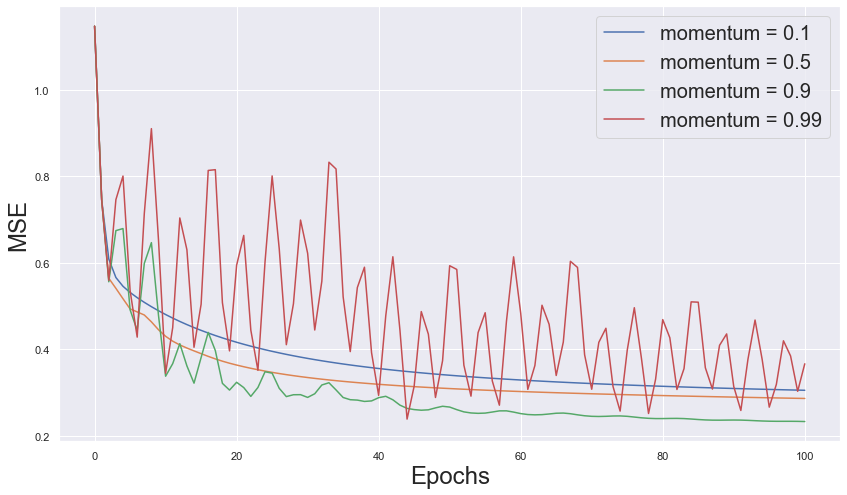

In [43]:
plt.figure(figsize=(14,8))
for i, mom in enumerate(mom_arr):
    plt.plot(np.linspace(0, epochs, epochs+1), MSE_arr[i], label=fr"momentum = {mom}")
plt.xlabel("Epochs", fontsize=24)
plt.ylabel("MSE", fontsize=24)
plt.legend(fontsize=20)
plt.show()

This analasys gives a estimate of an optimal model whith the following parameters:
Learning rate $= 0.3$
Batch size $= 128$
Momentum $= 0.9$
Theese where found only by looking at what we saw as resonoble parameters in our plots,
to do a more detatailed search for parameters one would do a grid search. Whith mode nomal.

# We could choose different modes

Modes like adam, adagrad and rms-prop would adjust the learning rate. We would like to investigate how this affect out models preformence.

Status: funker, men fobedringspotensiale.

In [ ]:
def grid_search(X, z, lambda_range, lr_range, momentum=0.9, mode="normal", store_extra = False):
    
    X_train, X_test, X_validation = X
    z_train, z_test, z_validation = z
    
    #set mini-bach size
    batch_size = 256
    #set nr of epochs
    epochs = 2000
    
    m = momentum
    
    optimal = [None, None]
    optimal_MSE = 1000
    MSE_grid = np.zeros((len(lr_range), len(lambda_range)))
    w_log = 0
    
    progress = 0
    
    for num1, i in enumerate(lambda_range):
        model = rcf.RidgeCost(i)
        progress += 100/len(lambda_range)
        for num2, j in enumerate(lr_range):
            #init weights
            w_init = np.zeros(len(X_train[0]))
            #Make model with i and j param
            descent = gd.GradientDescent(mode=mode, momentum_param=m, batch_size=batch_size, store_extra=store_extra)
            w = descent.train(X_train, w_init, z_train, model, learning_rate=j, n_epochs = epochs)
            #calculate MSE 
            mse = rt.MSE(z_test, X_test@w.flatten())
            if mse<optimal_MSE:
                optimal_MSE = mse
                optimal = [i, j]
                if store_extra:   
                    w_log = descent.weights
            MSE_grid[num2, num1] = mse
        print(f"progress = {progress:.2f}%", end="\r")
    
    if store_extra:
        return optimal, optimal_MSE, MSE_grid, w_log
    else:
        return optimal, optimal_MSE, MSE_grid

In [ ]:
import matplotlib.colors as colors
X = (X_train, X_test, 0)
z = (z_train, z_test, 0)
lamda_range = np.linspace(0.01, 0.1 , 15)
lr_range = np.linspace(0, 0.9, 15)

M, N = np.meshgrid(lamda_range, lr_range)

In [ ]:
print("RMS")
opt_rms = grid_search(X, z, lamda_range, lr_range, mode="rmsprop")

In [ ]:
print("Adam")
opt_adam = grid_search(X, z, lamda_range, lr_range, momentum = 0, mode="adam")

In [ ]:
print("Adagrad")
opt_adagrad = grid_search(X, z, lamda_range, lr_range, mode="adagrad")

In [ ]:
# Make a plot with more levels at low values with 50 levels
# RMS
plt.contourf(M, N, opt_rms[2], cmap="viridis")
plt.colorbar()
plt.xlabel("Lambda")
plt.ylabel("Learning rate")
plt.show()

In [ ]:
# Make a plot with 20 levels between 41 and 42
# ADAgrad
plt.contourf(M, N, opt_adagrad[2], cmap="viridis", levels=np.linspace(0.008, 0.009, 10))
plt.colorbar()
plt.xlabel("Lambda")
plt.ylabel("Learning rate")
plt.show()

In [ ]:
# Make a countourf plot
# ADAM
plt.contourf(M, N, opt_adam[2], cmap="viridis", levels=np.linspace(0, 0.1, 100))
plt.colorbar()
plt.xlabel("Lambda")
plt.ylabel("Learning rate")
plt.show()

## Plot MSE over epocs for the best model of each mode "adam", "rmsprop" and "adagrad"

In [ ]:
opt_rms_weights = grid_search(X, z, lamda_range, lr_range, mode="rmsprop", store_extra=True)

In [ ]:
opt_adam_weights = grid_search(X, z, lamda_range, lr_range, momentum = 0, mode="adam", store_extra=True)

In [ ]:
opt_adagrad_weights = grid_search(X, z, lamda_range, lr_range, mode="adagrad", store_extra=True)

In [ ]:
epochs = 2000
epoc_arr = np.linspace(0, epochs, epochs+1)

#RMS_prop
wlog_adagrad = opt_adagrad_weights[3]
wlog_rms = opt_rms_weights[3]
wlog_adam = opt_adam_weights[3]

# y_pred as an array corrosponding to predictiv y for each epoch 
z_pred_rms = (X_test@wlog_rms.T).T
z_pred_adam = (X_test@wlog_adam.T).T
z_pred_adagrad = (X_test@wlog_adagrad.T).T


MSE_rms = rt.MSE_vec(z_test, z_pred_rms)
MSE_adam = rt.MSE_vec(z_test, z_pred_adam)
MSE_adagrad = rt.MSE_vec(z_test, z_pred_adagrad)

plt.plot(epoc_arr[:10], MSE_rms[:10], label="rms_prop")
plt.plot(epoc_arr[:10], MSE_adam[:10], label="adam")
plt.plot(epoc_arr[:10], MSE_adagrad[:10], label="adagrad")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

# Grid-search for momentum

In [ ]:
def grid_search_momentum(X, z, lambda_range, lr_range, momentum_range, mode="normal", store_extra = False):
    
    X_train, X_test, X_validation = X
    z_train, z_test, z_validation = z
    
    #set mini-bach size
    batch_size = 256
    #set nr of epochs
    epochs = 2000
    
    optimal = [None, None, None]
    optimal_MSE = 1000
    MSE_grid = np.zeros((len(momentum_range), len(lr_range), len(lambda_range)))
    w_log = 0
    
    progress = 0
    
    for num1, i in enumerate(lambda_range):
        model = rcf.RidgeCost(i)
        progress += 100/len(lambda_range)
        for num2, j in enumerate(lr_range):
            for num3, k in enumerate(momentum_range):
                #init weights
                w_init = np.zeros(len(X_train[0]))
                #Make model with i and j param
                descent = gd.GradientDescent(mode=mode, momentum_param=k, batch_size=batch_size, store_extra=store_extra)
                w = descent.train(X_train, w_init, z_train, model, learning_rate=j, n_epochs = epochs)
                #calculate MSE 
                mse = rt.MSE(z_test, X_test@w.flatten())
                if mse<optimal_MSE:
                    optimal_MSE = mse
                    optimal = [i, j, k]
                    if store_extra:   
                        w_log = descent.weights
                MSE_grid[num3, num2, num1] = mse
        print(f"progress = {progress:.2f}%", end="\r")
    
    if store_extra:
        return optimal, optimal_MSE, MSE_grid, w_log
    else:
        return optimal, optimal_MSE, MSE_grid

In [ ]:
X = (X_train, X_test, 0)
z = (z_train, z_test, 0)
lamda_range = np.linspace(0, 0.5, 6)
lr_range = np.linspace(0.1, 0.4, 4)
momentum_range = np.linspace(0, 0.95, 10)

M, N = np.meshgrid(lamda_range, lr_range)

In [ ]:
print("Adagrad")
opt_adagrad = grid_search_momentum(X, z, lamda_range, lr_range, momentum_range, mode="adagrad")

In [ ]:
print(opt_adagrad)